In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

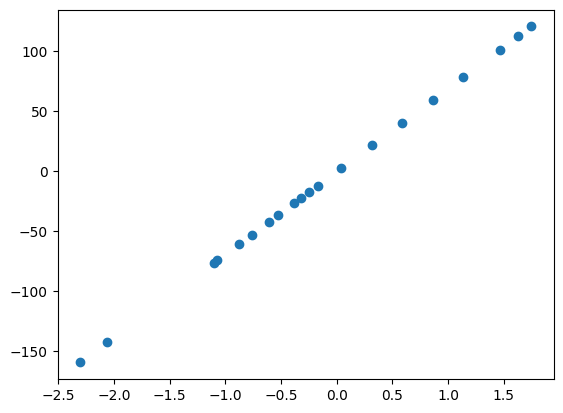

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    # возвращает теоретическое значение
    def predict(self, x):
        return self.b0 + self.b1 * x
    # функция ошибки
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    # градиентный спуск
    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1


In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


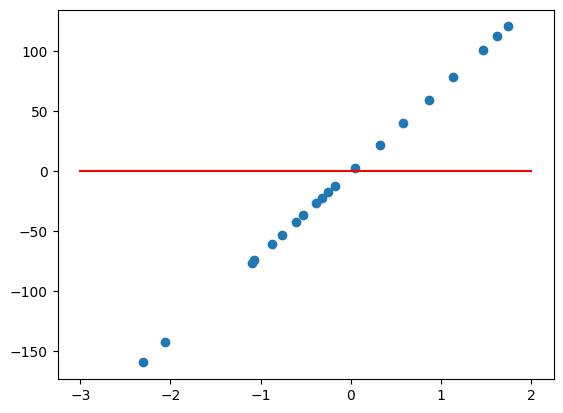

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
#  Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


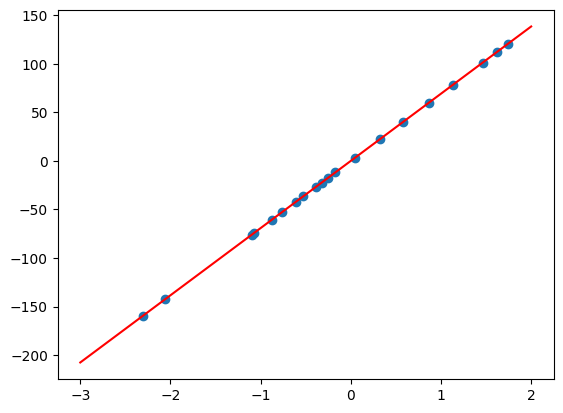

In [ ]:
# Посмотрим, как теперь наша регрессия выглядит на графике:

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

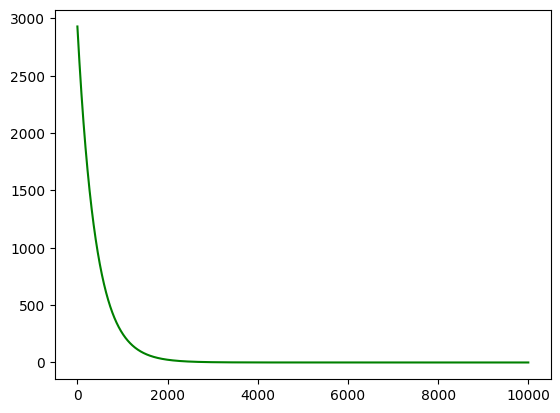

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

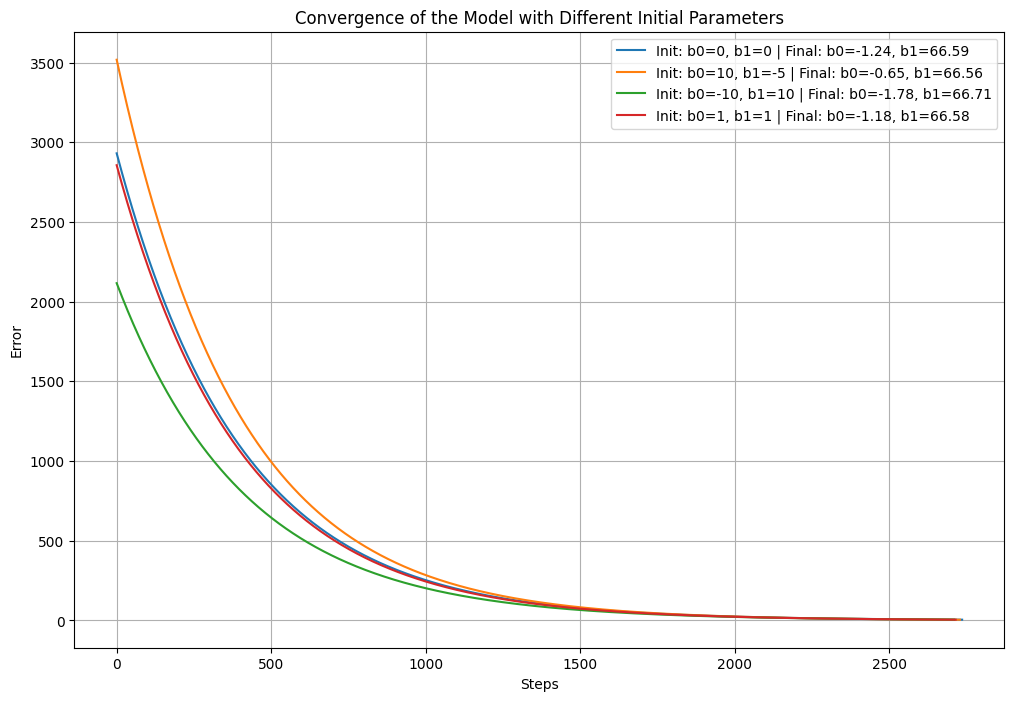

In [ ]:
# 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

# Класс для парной линейной регрессии
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)
            if step > 0 and abs(errors[-1] - errors[-2]) < accuracy:
                break
        return steps, errors

# Проверка работы модели с разными начальными значениями параметров
initial_values = [(0, 0), (10, -5), (-10, 10), (1, 1)]

results = []
for b0, b1 in initial_values:
    model = Model(b0, b1)
    steps, errors = model.fit(x, y)
    results.append((b0, b1, steps, errors, model.b0, model.b1))

# Построение графиков ошибок
plt.figure(figsize=(12, 8))
for i, (b0, b1, steps, errors, final_b0, final_b1) in enumerate(results):
    plt.plot(steps, errors, label=f"Init: b0={b0}, b1={b1} | Final: b0={final_b0:.2f}, b1={final_b1:.2f}")

plt.xlabel("Steps")
plt.ylabel("Error")
plt.title("Convergence of the Model with Different Initial Parameters")
plt.legend()
plt.grid(True)
plt.show()


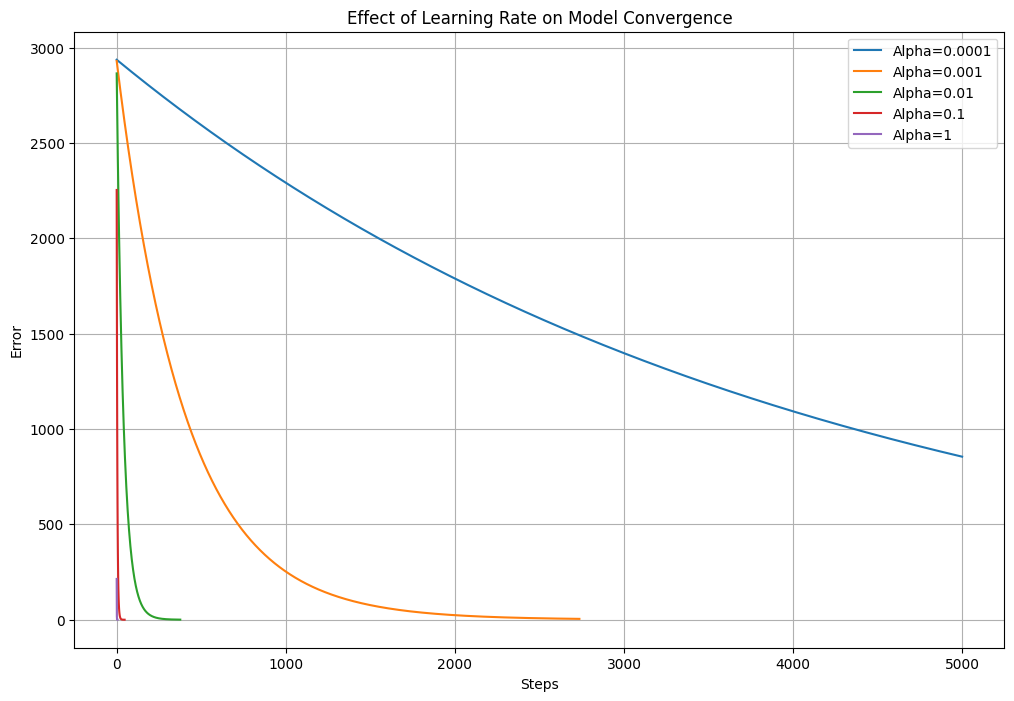

[]

In [ ]:
# 2. Проверка работы модели с разными значениями скорости обучения
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

results_alpha = []
for alpha in learning_rates:
    model = Model()
    steps, errors = model.fit(x, y, alpha=alpha)
    results_alpha.append((alpha, steps, errors))

# Построение графиков ошибок
plt.figure(figsize=(12, 8))
for alpha, steps, errors in results_alpha:
    plt.plot(steps, errors, label=f"Alpha={alpha}")

plt.xlabel("Steps")
plt.ylabel("Error")
plt.title("Effect of Learning Rate on Model Convergence")
plt.legend()
plt.grid(True)
plt.show()

# Определение значения alpha, при котором наблюдается расхождение
diverging_alpha = [alpha for alpha, _, errors in results_alpha if errors[-1] > errors[0]]
diverging_alpha


In [ ]:
# Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame.
#  При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    # Подготовка данных
    def _prepare_data(self, data):
        # Преобразование входных данных в numpy массив
        if isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец.")
            data = data.iloc[:, 0]  # Извлекаем единственный столбец
        return np.array(data)

    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        steps, errors = [], []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)
            if step > 0 and abs(errors[-1] - errors[-2]) < accuracy:
                break
        return steps, errors


In [ ]:
# Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def _prepare_data(self, data):
        """Преобразование входных данных в numpy массив"""
        if isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец.")
            data = data.iloc[:, 0]  # Извлекаем единственный столбец
        return np.array(data)

    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=1e-6, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        steps, errors = [], []
        prev_error = float('inf')  # Изначально ошибка бесконечно велика

        for step in range(max_steps):
            # Градиенты
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            # Обновление коэффициентов
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            # Вычисление ошибки
            new_error = self.error(X, Y)
            steps.append(step)
            errors.append(new_error)

            # Условия остановки
            if abs(prev_error - new_error) < accuracy:
                print(f"Алгоритм завершен: ошибка перестала существенно снижаться на шаге {step}")
                break

            prev_error = new_error  # Обновляем предыдущую ошибку

        else:
            # Если цикл завершился без прерывания
            print(f"Алгоритм завершен после достижения максимального количества шагов ({max_steps})")

        return steps, errors


In [ ]:
# Пример использования

model = Model()
steps, errors = model.fit(x, y, alpha=0.001, accuracy=1e-6, max_steps=5000)

Алгоритм завершен после достижения максимального количества шагов (5000)


In [ ]:
# Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

class Model(object):
    """Модель парной линейной регрессии с адаптивной скоростью обучения"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def _prepare_data(self, data):
        """Преобразование входных данных в numpy массив"""
        if isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец.")
            data = data.iloc[:, 0]  # Извлекаем единственный столбец
        return np.array(data)

    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, initial_alpha=1.0, accuracy=1e-6, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)

        alpha = initial_alpha  # Начальная скорость обучения
        steps, errors = [], []
        prev_error = float('inf')  # Изначально ошибка бесконечно велика
        step = 0

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            # Обновляем параметры
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            # Вычисляем новую ошибку
            new_error = self.error(X, Y)
            steps.append(step)
            errors.append(new_error)

            # Если ошибка увеличилась, уменьшаем скорость обучения и перезапускаем
            if new_error > prev_error:
                print(f"Ошибка увеличилась на шаге {step}. Уменьшаем скорость обучения: {alpha} -> {alpha / 2}")
                alpha /= 2
                # Перезапуск градиентного спуска с текущими параметрами
                steps = []
                errors = []
                prev_error = float('inf')  # Сбрасываем сравнение
                continue

            # Проверяем условие сходимости
            if abs(prev_error - new_error) < accuracy:
                print(f"Алгоритм завершен: ошибка перестала существенно снижаться на шаге {step}")
                break

            prev_error = new_error  # Обновляем предыдущую ошибку
            step += 1

        if step >= max_steps:
            print(f"Алгоритм завершен после достижения максимального количества шагов ({max_steps})")

        return steps, errors


In [ ]:
model = Model()
steps, errors = model.fit(x, y, initial_alpha=1.0, accuracy=1e-6, max_steps=5000)


Алгоритм завершен: ошибка перестала существенно снижаться на шаге 9


In [ ]:
# Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

class Model(object):
    """Модель парной линейной регрессии с визуализацией"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def _prepare_data(self, data):
        """Преобразование входных данных в numpy массив"""
        if isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец.")
            data = data.iloc[:, 0]  # Извлекаем единственный столбец
        return np.array(data)

    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, initial_alpha=1.0, accuracy=1e-6, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)

        alpha = initial_alpha
        steps, errors = [], []
        prev_error = float('inf')
        step = 0

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(X, Y)
            steps.append(step)
            errors.append(new_error)

            if new_error > prev_error:
                print(f"Ошибка увеличилась на шаге {step}. Уменьшаем скорость обучения: {alpha} -> {alpha / 2}")
                alpha /= 2
                steps, errors = [], []
                prev_error = float('inf')
                continue

            if abs(prev_error - new_error) < accuracy:
                print(f"Алгоритм завершен: ошибка перестала существенно снижаться на шаге {step}")
                break

            prev_error = new_error
            step += 1

        if step >= max_steps:
            print(f"Алгоритм завершен после достижения максимального количества шагов ({max_steps})")

        self.steps = steps
        self.errors = errors
        return steps, errors

    def plot(self, X, Y):
        """Рисование графиков ошибок и предсказаний"""
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        predictions = self.predict(X)

        # Нормализуем данные для независимости от масштаба
        X_norm = (X - X.min()) / (X.max() - X.min())
        Y_norm = (Y - Y.min()) / (Y.max() - Y.min())
        pred_norm = (predictions - predictions.min()) / (predictions.max() - predictions.min())

        # График предсказаний
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(X_norm, Y_norm, color='blue', label='Истинные значения')
        plt.plot(X_norm, pred_norm, color='red', label='Предсказания')
        plt.title("Сравнение истинных значений и предсказаний")
        plt.xlabel("Нормализованные X")
        plt.ylabel("Нормализованные Y")
        plt.legend()
        plt.grid(True)

        # График ошибок
        plt.subplot(1, 2, 2)
        plt.plot(self.steps, self.errors, color='green', label='Ошибка')
        plt.title("График ошибок")
        plt.xlabel("Шаги")
        plt.ylabel("Ошибка")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


Алгоритм завершен: ошибка перестала существенно снижаться на шаге 9


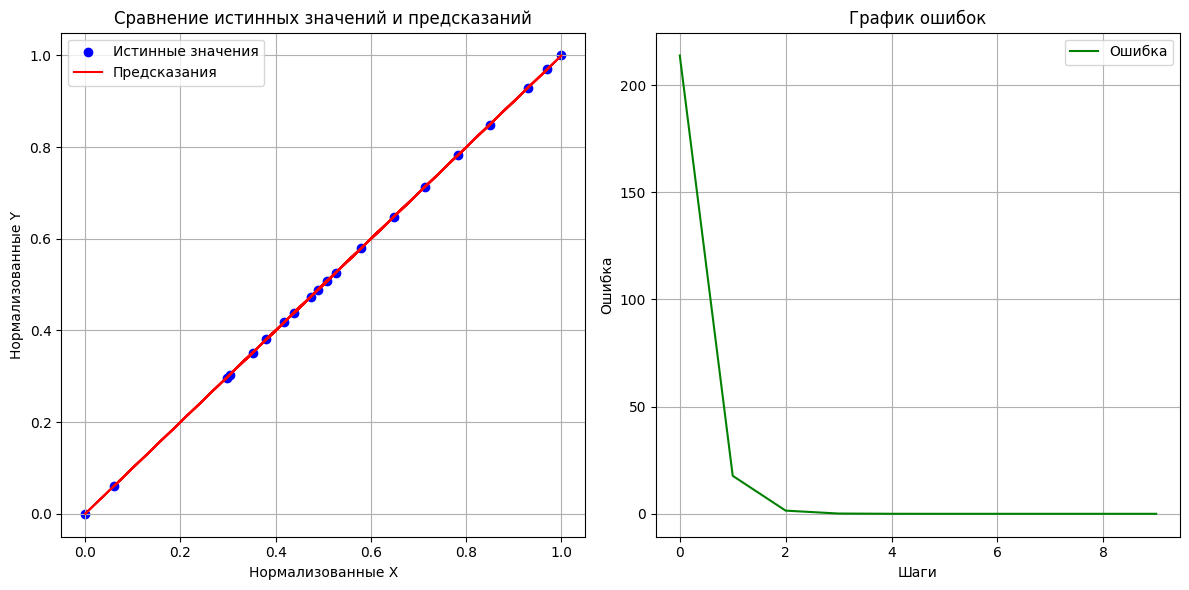

In [ ]:
model = Model()
steps, errors = model.fit(x, y, initial_alpha=1.0, accuracy=1e-6, max_steps=5000)
model.plot(x, y)
